In [1]:
# подключаем библиотеку
%run libs/pump_unit.ipynb

In [2]:
# файлы с характеристиками насосов
files = ['data/pump.csv',
         'data/pump.csv',
         'data/pump.csv',
         'data/pump.csv']

In [3]:
# шаг изменения параметров при рассчете
flow_step=10.0
head_step=0.2

In [4]:
# первый подъём
pb_1 = PumpBattery(flow_step, head_step, files)
pb_1.calc_units_matrices()

# второй подъём
pb_2 = PumpBattery(flow_step, head_step, files)
pb_2.calc_units_matrices()

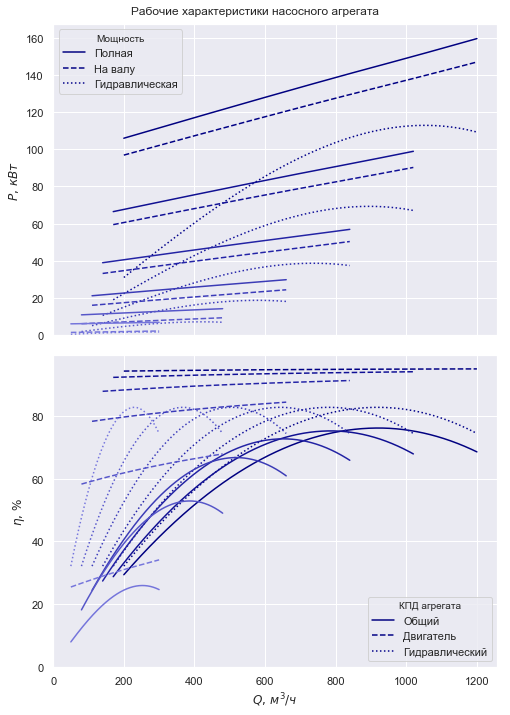

In [5]:
pb_1.units[0].plot_work_curves()

In [6]:
# посчитаем один из вариантов работы
scenario = 0
pb_1.calc_mutation_matrix(scenario)
pb_2.calc_mutation_matrix(scenario)

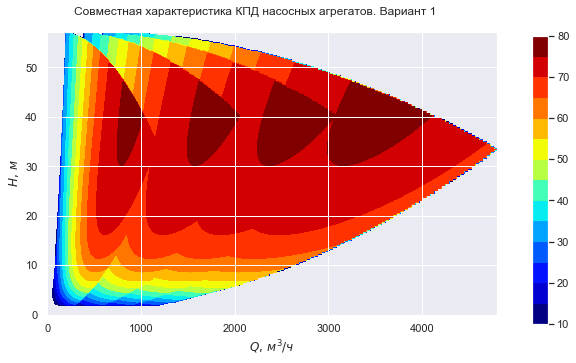

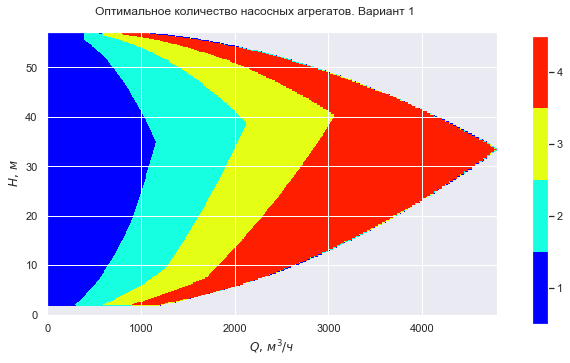

In [7]:
# посмотрим на результат
pb_1.plot_eff_total_map(scenario)
pb_1.plot_count_total_map(scenario)

In [12]:
# работа с данными из файлов

In [13]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [14]:
# конвертер величин

def convert_unit(kind, value, unit_in, unit_out):
    unit = {
        'head': {'m':1.0, 'kgf_cm2':10.0, 'bar':10.197, 'kPa':0.10197, 'atm':10.33, 'psi':0.70307},
        'flow': {'cbmh':1.0, 'cbms':3600.0, 'lpm':0.06, 'lps':3.6},
        'power': {'kW':1.0, 'W':0.001}
    }
    return value * unit[kind][unit_in] / unit[kind][unit_out]

In [15]:
# читаем показания

log_1 = pd.read_csv('data/log_06_04_2019.csv', sep=';', decimal=',')
log_1["date"] = pd.to_datetime(log_1["date"], format="%d.%m.%Y %H:%M")
log_1.fillna(method ='ffill', inplace=True)

log_2 = pd.read_csv('data/log_21_04_2019.csv', sep=';', decimal=',')
log_2["date"] = pd.to_datetime(log_2["date"], format="%d.%m.%Y %H:%M")
log_2.fillna(method ='ffill', inplace=True)

In [16]:
# объединяем 2 набора данных для обработки

frames = [log_1, log_2]
log = pd.concat(frames, ignore_index=True)

num = log_1.shape[0]

In [17]:
# преобразуем показания давления

head_cols = ['head in', 'head out', 'head in lift 1', 'head out lift 1', 'head in lift 2', 'head out lift 2']
for col in head_cols:
    log[col] = log[col].apply(lambda x: convert_unit('head', x, 'bar', 'm'))

In [18]:
log.head()

,date,flow,head out,head in,head in lift 1,head out lift 1,power sup. unit 1,freq unit 1,voltage unit 1,current unit 1,...,voltage unit 5,current unit 5,power sup. unit 6,freq unit 6,voltage unit 6,current unit 6,power sup. unit 6.1,freq unit 6.1,voltage unit 6.1,current unit 6.1
0,2019-04-06 01:00:00,1420.0,78.5169,35.6895,35.6895,59.1426,128.0,40.0,380.0,240.0,...,0.0,0.0,128.0,40.0,380.0,240.0,0.0,0.0,0.0,0.0
1,2019-04-06 02:00:00,1420.0,78.5169,35.6895,35.6895,59.1426,128.0,40.0,380.0,240.0,...,0.0,0.0,128.0,40.0,380.0,240.0,0.0,0.0,0.0,0.0
2,2019-04-06 03:00:00,1460.0,78.5169,32.6304,32.6304,59.1426,135.0,43.0,380.0,260.0,...,0.0,0.0,135.0,43.0,380.0,260.0,0.0,0.0,0.0,0.0
3,2019-04-06 04:00:00,1460.0,78.5169,32.6304,32.6304,59.1426,135.0,43.0,380.0,260.0,...,0.0,0.0,135.0,43.0,380.0,260.0,0.0,0.0,0.0,0.0
4,2019-04-06 05:00:00,1500.0,78.5169,34.6698,34.6698,59.1426,130.0,42.0,380.0,250.0,...,0.0,0.0,130.0,42.0,380.0,250.0,0.0,0.0,0.0,0.0


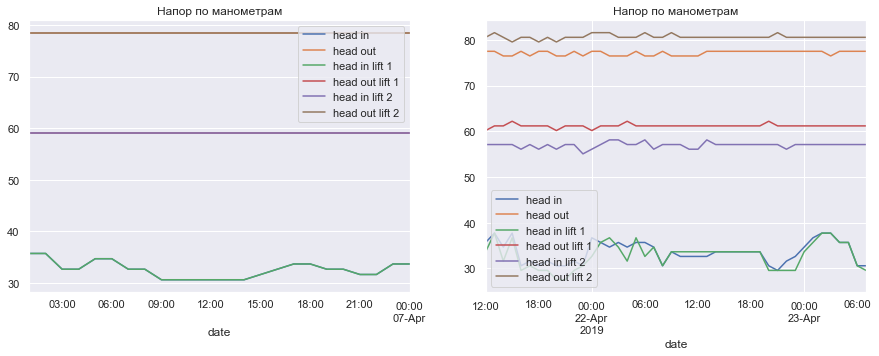

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', head_cols, figsize=(15, 5), title='Напор по манометрам', ax=axes[0])
log[num:].plot('date', head_cols, figsize=(15, 5), title='Напор по манометрам', ax=axes[1])

In [20]:
# корректировка на высоту установки датчиков

head_in_height = 2.0
head_out_height = 2.0

head_in_N_height = 3.1
head_out_N_height = 3.8

log['head in adj'] = log['head in'] - head_in_height
log['head out adj'] = log['head out'] - head_out_height
log[['head in adj lift 1', 'head in adj lift 2']] = log[['head in lift 1', 'head in lift 2']] - head_in_N_height
log[['head out adj lift 1', 'head out adj lift 2']] = log[['head out lift 1', 'head out lift 2']] - head_out_N_height

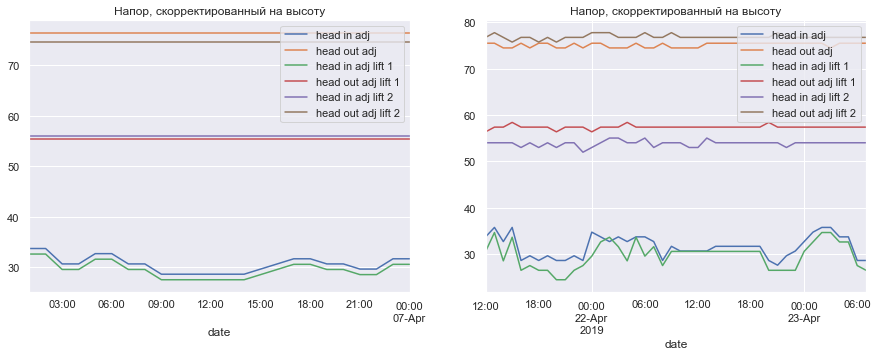

In [21]:
head_adj_cols = ['head in adj', 'head out adj', 
                 'head in adj lift 1', 'head out adj lift 1', 
                 'head in adj lift 2', 'head out adj lift 2']

fig, axes = plt.subplots(nrows=1, ncols=2)
log[:num].plot('date', head_adj_cols, figsize=(15, 5), title='Напор, скорректированный на высоту', ax=axes[0])
log[num:].plot('date', head_adj_cols, figsize=(15, 5), title='Напор, скорректированный на высоту', ax=axes[1])

In [22]:
pb_1.hist_head = log['head out adj lift 1'] - log['head in adj lift 1']
pb_2.hist_head = log['head out adj lift 2'] - log['head in adj lift 2']

KeyError: 'head lift 1'

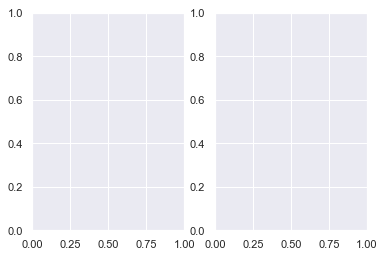

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', 'head lift 1', figsize=(15, 5), title='Напор насосов 1 подъёма', ax=axes[0])
log[:num].plot('date', 'head lift 2', figsize=(15, 5), title='Напор насосов 2 подъёма', ax=axes[1])

KeyError: 'head lift 1'

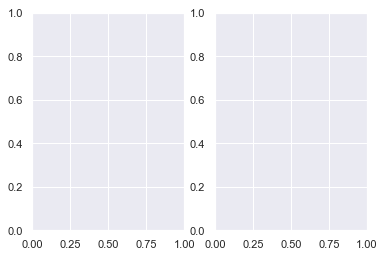

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[num:].plot('date', 'head lift 1', figsize=(15, 5), title='Напор насосов 1 подъёма', ax=axes[0])
log[num:].plot('date', 'head lift 2', figsize=(15, 5), title='Напор насосов 2 подъёма', ax=axes[1])

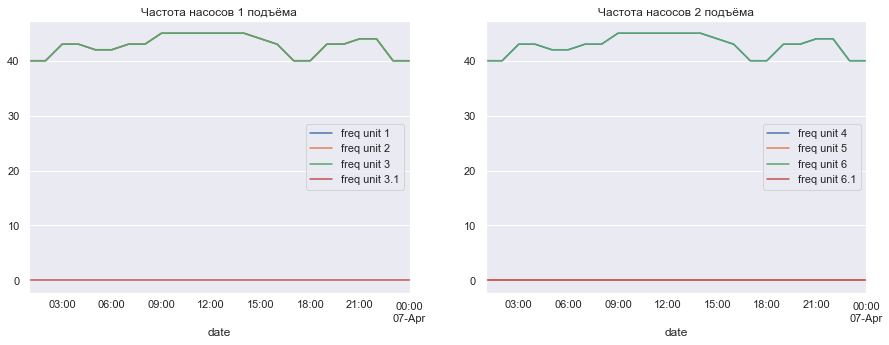

In [108]:
freq_cols_1 = ['freq unit 1', 'freq unit 2', 'freq unit 3', 'freq unit 3.1']
freq_cols_2 = ['freq unit 4', 'freq unit 5', 'freq unit 6', 'freq unit 6.1']

fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', freq_cols_1, figsize=(15, 5), title='Частота насосов 1 подъёма', ax=axes[0])
log[:num].plot('date', freq_cols_2, figsize=(15, 5), title='Частота насосов 2 подъёма', ax=axes[1])

In [135]:
# нормируем на максимальную частоту

for idx, col in enumerate(freq_cols_1):
    pb_1.units[idx].hist_freq = log[col] / 50.0

for idx, col in enumerate(freq_cols_2):
    pb_2.units[idx].hist_freq = log[col] / 50.0

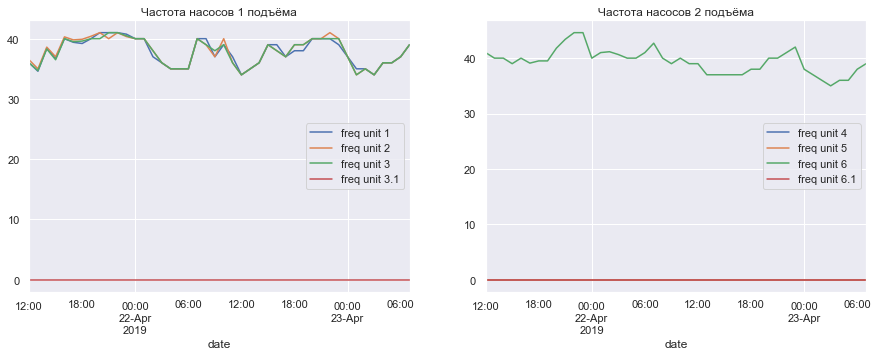

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[num:].plot('date', freq_cols_1, figsize=(15, 5), title='Частота насосов 1 подъёма', ax=axes[0])
log[num:].plot('date', freq_cols_2, figsize=(15, 5), title='Частота насосов 2 подъёма', ax=axes[1])

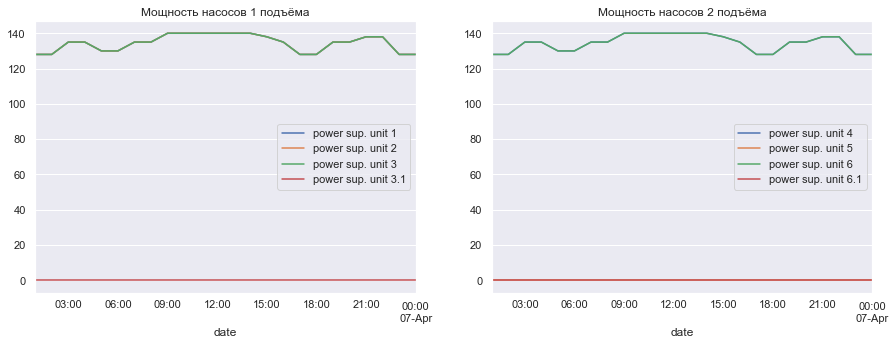

In [116]:
power_sup_cols_1 = ['power sup. unit 1', 'power sup. unit 2', 'power sup. unit 3', 'power sup. unit 3.1']
power_sup_cols_2 = ['power sup. unit 4', 'power sup. unit 5', 'power sup. unit 6', 'power sup. unit 6.1']

fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', power_sup_cols_1, figsize=(15, 5), title='Мощность насосов 1 подъёма', ax=axes[0])
log[:num].plot('date', power_sup_cols_2, figsize=(15, 5), title='Мощность насосов 2 подъёма', ax=axes[1])

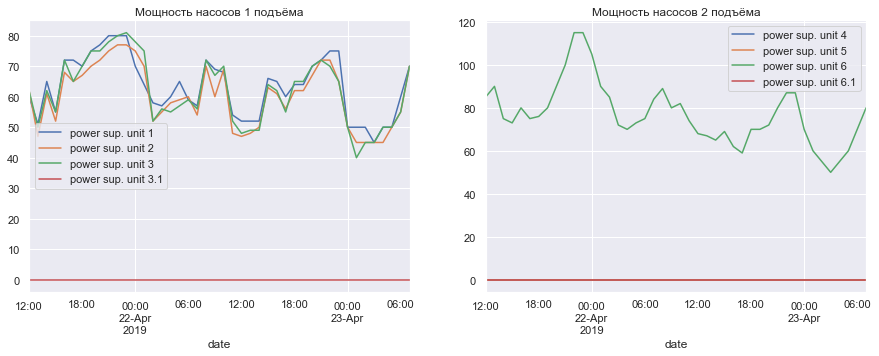

In [117]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[num:].plot('date', power_sup_cols_1, figsize=(15, 5), title='Мощность насосов 1 подъёма', ax=axes[0])
log[num:].plot('date', power_sup_cols_2, figsize=(15, 5), title='Мощность насосов 2 подъёма', ax=axes[1])

In [141]:
# суммарная мощность насосов

#log['power sup. lift 1'], log['power sup. lift 2'] = 0, 0
for power in power_sup_cols_1:
    pb_1.hist_power_supply += log[power]
for power in power_sup_cols_2:
    pb_2.hist_power_supply += log[power]

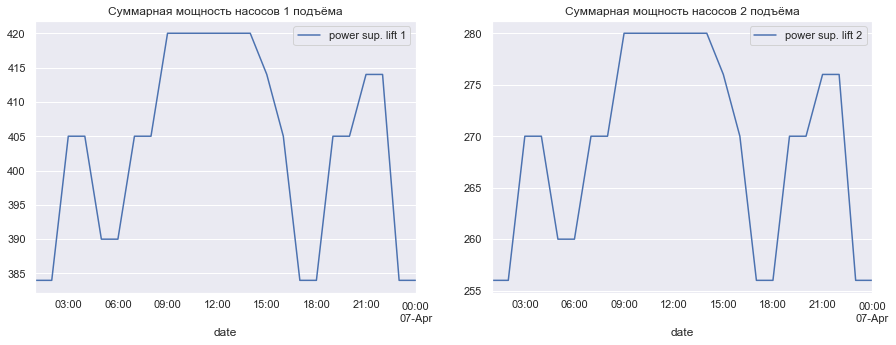

In [120]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[:num].plot('date', 'power sup. lift 1', figsize=(15, 5), title='Суммарная мощность насосов 1 подъёма', ax=axes[0])
log[:num].plot('date', 'power sup. lift 2', figsize=(15, 5), title='Суммарная мощность насосов 2 подъёма', ax=axes[1])

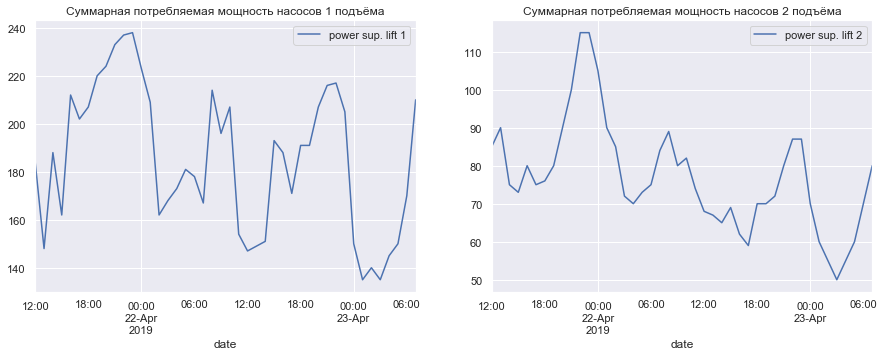

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=2)

log[num:].plot('date', 'power sup. lift 1', figsize=(15, 5), 
               title='Суммарная потребляемая мощность насосов 1 подъёма', ax=axes[0])
log[num:].plot('date', 'power sup. lift 2', figsize=(15, 5), 
               title='Суммарная потребляемая мощность насосов 2 подъёма', ax=axes[1])

In [30]:
#log_1['N_hydro1'] = 998.0 * 9.81 * log_1['P_lift1'] * log_1['Q'] / 3600.0 / 1000.0
#pb.hist_power_rate = (pb.hist_power_supply / pb.hist_flow).replace([np.inf, -np.inf], np.nan).fillna(0)
#pb.hist_eff_total = pb.hist_power_hydro / pb.hist_power_supply * 100.0

In [31]:
#log_1.plot('date', 'N_hydro1')

In [ ]:
lift_cols_1 = ['Pin1', 'Pout1', 'N_1', 'f_1', 'U_1', 'I_1', 'N_2', 'f_2', 'U_2', 'I_2',
               'N_3', 'f_3', 'U_3', 'I_3', 'N_3.1', 'f_3.1', 'U_3.1', 'I_3.1']
lift_cols_2 = ['Pin2', 'Pout2', 'N_4', 'f_4', 'U_4', 'I_4', 'N_5', 'f_5', 'U_5', 'I_5',
               'N_6', 'f_6', 'U_6', 'I_6', 'N_6.1', 'f_6.1', 'U_6.1', 'I_6.1']
comm_cols = ['Q', 'Pout', 'Pin']

In [2]:
import pandas as pd

In [15]:
log = pd.read_csv('data/pumps_06_04_2019.csv', sep=';', decimal=',')
log.fillna(0, inplace=True)
log["date"] = pd.to_datetime(log["date"], format="%d.%m.%Y %H:%M")

In [20]:
log.head()

,date,Q,Pout,Pin,Pin1,Pout1,N_1,f_1,U_1,I_1,...,U_5,I_5,N_6,f_6,U_6,I_6,N_6.1,f_6.1,U_6.1,I_6.1
0,2019-04-06 01:00:00,1 420,7.7,3.5,3.5,5.8,128,40,380,240,...,0,0,128,40,380,240,0,0,0,0
1,2019-04-06 02:00:00,1 420,7.7,3.5,3.5,5.8,128,40,380,240,...,0,0,128,40,380,240,0,0,0,0
2,2019-04-06 03:00:00,1460,7.7,3.2,3.2,5.8,135,43,380,260,...,0,0,135,43,380,260,0,0,0,0
3,2019-04-06 04:00:00,1460,7.7,3.2,3.2,5.8,135,43,380,260,...,0,0,135,43,380,260,0,0,0,0
4,2019-04-06 05:00:00,1500,7.7,3.4,3.4,5.8,130,42,380,250,...,0,0,130,42,380,250,0,0,0,0


In [18]:
log.columns

Index(['date', 'Q', 'Pout', 'Pin', 'Pin1', 'Pout1', 'N_1', 'f_1', 'U_1', 'I_1',
       'N_2', 'f_2', 'U_2', 'I_2', 'N_3', 'f_3', 'U_3', 'I_3', 'N_3.1',
       'f_3.1', 'U_3.1', 'I_3.1', 'Pin2', 'Pout2', 'N_4', 'f_4', 'U_4', 'I_4',
       'N_5', 'f_5', 'U_5', 'I_5', 'N_6', 'f_6', 'U_6', 'I_6', 'N_6.1',
       'f_6.1', 'U_6.1', 'I_6.1'],
      dtype='object')